# Round 1 - 1 Billion Rows Challenge

In [25]:
# Imports

# Using Polars as it's much faster than Pandas
import polars as pl
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [26]:
df = pl.read_csv("data/sensor_data.csv")
df

sensor_id,sensor_reading,control_value,temperature,pressure,humidity,performance_metric,env_index,adjusted_sensor
i64,f64,i64,f64,f64,f64,f64,f64,f64
103,107.2,51,30.82,1018.93,69.07,158.2,338.728,161.872
436,118.86,39,31.9,1007.78,73.6,157.86,337.174,165.2154
349,105.47,52,26.69,1025.11,44.62,157.47,331.595,160.3144
271,117.57,64,19.36,1004.81,42.15,181.57,321.832,192.8148
107,95.13,29,20.36,999.88,73.97,124.13,330.299,122.7177
…,…,…,…,…,…,…,…,…
415,85.35,61,27.89,1024.01,34.01,146.35,328.562,137.4135
494,92.56,47,19.93,1008.53,74.5,139.56,332.881,136.0632
335,85.92,65,27.83,1016.02,35.29,150.92,326.525,141.768


In [27]:
# Find out number of null values in each column
df.null_count()

sensor_id,sensor_reading,control_value,temperature,pressure,humidity,performance_metric,env_index,adjusted_sensor
u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,0,0,0,0,0,0


In [28]:
print("Number of Unique Sensor IDs: ", df["sensor_id"].n_unique())

Number of Unique Sensor IDs:  500


In [29]:
# First, add a combined column to the original dataframe
df_with_combined = df.with_columns(
    (pl.col("sensor_reading") + pl.col("control_value")).alias("combined_value")
)

# Calculate statistics for all columns at once
stats = {
    "mean": df_with_combined.select(pl.mean(df_with_combined.columns)),
    "median": df_with_combined.select(pl.median(df_with_combined.columns)),
    "min": df_with_combined.select(pl.min(df_with_combined.columns)),
    "max": df_with_combined.select(pl.max(df_with_combined.columns)),
    "std": df_with_combined.select(pl.std(df_with_combined.columns))
}

# Create statistics dataframe with proper syntax (list of dictionaries)
stat_df = pl.DataFrame([
    {
        "Reading": "Sensor Readings",
        "Mean": stats["mean"]["sensor_reading"][0],
        "Median": stats["median"]["sensor_reading"][0],
        "Min": stats["min"]["sensor_reading"][0],
        "Max": stats["max"]["sensor_reading"][0],
        "Standard Deviation": stats["std"]["sensor_reading"][0],
    },
    {
        "Reading": "Control Values",
        "Mean": stats["mean"]["control_value"][0],
        "Median": stats["median"]["control_value"][0],
        "Min": stats["min"]["control_value"][0],
        "Max": stats["max"]["control_value"][0],
        "Standard Deviation": stats["std"]["control_value"][0],
    },
    {
        "Reading": "Combined Values",
        "Mean": stats["mean"]["combined_value"][0],
        "Median": stats["median"]["combined_value"][0],
        "Min": stats["min"]["combined_value"][0],
        "Max": stats["max"]["combined_value"][0],
        "Standard Deviation": stats["std"]["combined_value"][0],
    }
])

# Display the statistics dataframe
stat_df

Reading,Mean,Median,Min,Max,Standard Deviation
str,f64,f64,f64,f64,f64
"""Sensor Readings""",100.000359,100.01,24.27,169.93,15.006399
"""Control Values""",50.007403,50.0,22.0,86.0,7.070789
"""Combined Values""",150.007762,149.96,71.58,228.49,16.593408


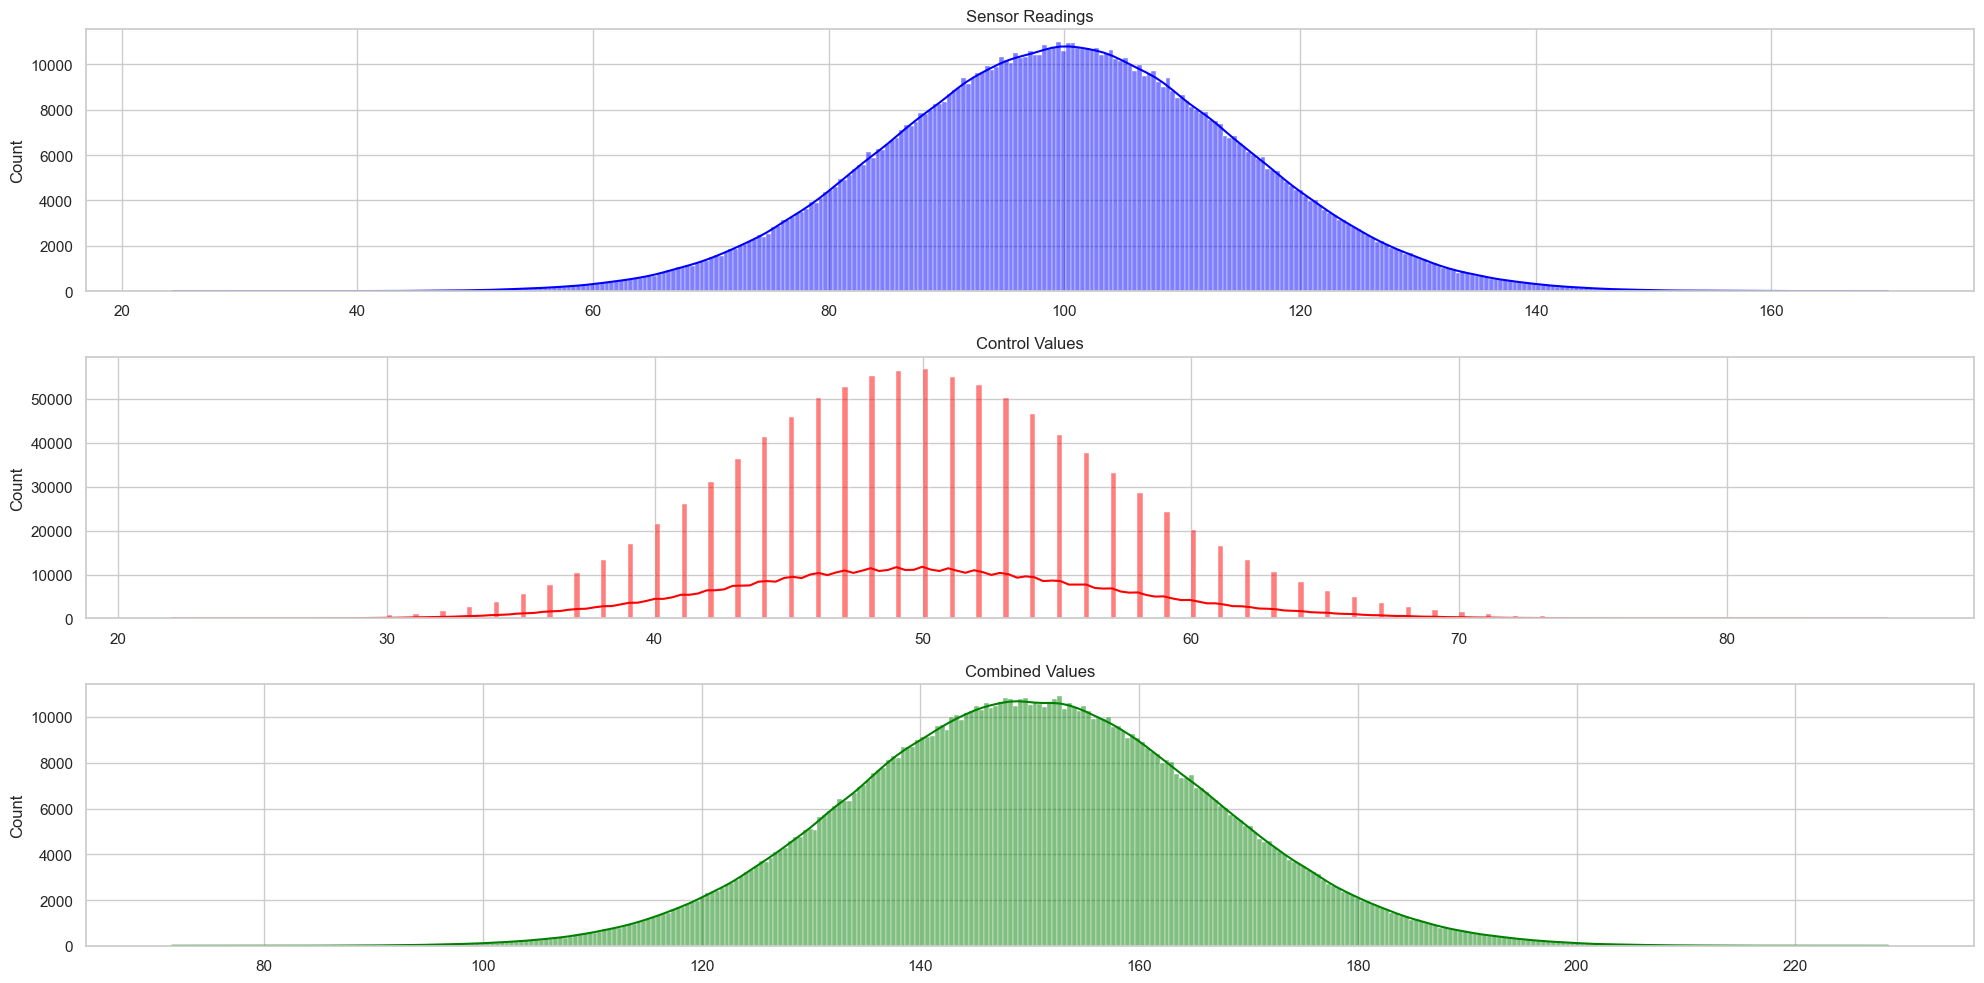

In [ ]:
# Plotting all the columns
sns.set(style="whitegrid")
plt.figure(figsize=(20, 10))

# Plotting Sensor Readings
plt.subplot(3, 1, 1)
sns.histplot(df["sensor_reading"], kde=True, color="blue")
plt.title("Sensor Readings")

# Plotting Control Values
plt.subplot(3, 1, 2)
sns.histplot(df["control_value"], kde=True, color="red")
plt.title("Control Values")

# Plotting Combined Values
plt.subplot(3, 1, 3)
sns.histplot(df_with_combined["combined_value"], kde=True, color="green")
plt.title("Combined Values")

plt.tight_layout()

plt.show()